# Média movel com Pandas

In [8]:
!pip install yfinance

In [5]:
import pandas as pd
import yfinance as yf

In [15]:
dados_empresas = yf.download('ITUB4.SA', start = '2018-01-01', end = '2024-03-26')
dados_empresas

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,28.533333,29.253332,28.533333,29.253332,21.739330,16650900
2018-01-03,29.266666,29.559999,29.046665,29.453333,21.887960,22295700
2018-01-04,29.500000,30.200001,29.500000,30.066666,22.343748,23222550
2018-01-05,30.080000,30.213333,29.733334,30.153334,22.408157,15717450
2018-01-08,30.040001,30.213333,29.853333,30.053333,22.333849,12708150
...,...,...,...,...,...,...
2024-03-19,34.759998,34.849998,34.639999,34.730000,34.486164,10533300
2024-03-20,34.730000,35.000000,34.560001,34.799999,34.555672,17439700
2024-03-21,34.799999,34.930000,34.270000,34.439999,34.198200,33569600


In [19]:
cotacoes_ajustadas = dados_empresas['Adj Close']

retornos_diarios = cotacoes_ajustadas.pct_change().dropna()

retorno_5_dias = cotacoes_ajustadas.pct_change(periods = 5).dropna()

retornos_diarios

Date
2018-01-03    0.006837
2018-01-04    0.020824
2018-01-05    0.002883
2018-01-08   -0.003316
2018-01-09   -0.010871
                ...   
2024-03-19    0.001442
2024-03-20    0.002016
2024-03-21   -0.010345
2024-03-22   -0.013983
2024-03-25    0.000000
Name: Adj Close, Length: 1544, dtype: float64

In [21]:
cotacoes_ajustadas 

cotacoes_mensais = cotacoes_ajustadas.resample('M').last()

r1 = cotacoes_mensais.pct_change().dropna()

r6 = cotacoes_mensais.pct_change(periods = 6).dropna()

r6

Date
2018-07-31   -0.101241
2018-08-31   -0.146964
2018-09-30   -0.125519
2018-10-31   -0.018276
2018-11-30    0.278239
                ...   
2023-11-30    0.227575
2023-12-31    0.221213
2024-01-31    0.169262
2024-02-29    0.305339
2024-03-31    0.303557
Freq: M, Name: Adj Close, Length: 69, dtype: float64

In [26]:
media_movel = pd.DataFrame(index = cotacoes_ajustadas.index)

media_movel['cotacoes_itb'] = cotacoes_ajustadas.values

media_movel['media_movel_devagar'] = media_movel['cotacoes_itb'].rolling(200).mean()

media_movel['media_movel_rapida'] = media_movel['cotacoes_itb'].rolling(50).mean()

media_movel = media_movel.dropna()

media_movel


,cotacoes_itb,media_movel_devagar,media_movel_rapida
Date,,,
2018-10-18,25.202190,23.929502,23.140434
2018-10-19,25.175924,23.946685,23.177367
2018-10-22,25.543623,23.964963,23.224137
2018-10-23,25.632914,23.981409,23.289556
2018-10-24,24.965826,23.994197,23.338116
...,...,...,...
2024-03-19,34.486164,28.656685,32.892914
2024-03-20,34.555672,28.706983,32.943584
2024-03-21,34.198200,28.753689,32.987489


<Axes: xlabel='Date'>

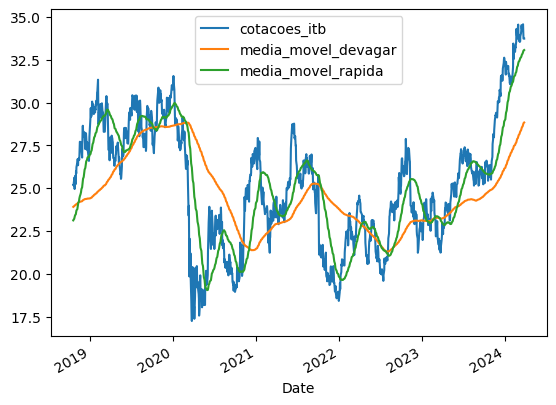

In [27]:
media_movel.plot()